# **Soal Praktikum Overfitting Handling #3 dan #4**

## Kegiatan 1 **(Individu)** 
70 poin

**Peraturan :**
* Tidak boleh ada error dalam kode program
* Kali ini anda dibebaskan untuk memilih satu dataset untuk kasus klasifikasi citra penyakit (pada manusia, hewan atau tumbuhan) menggunakan model CNN.
* Pastikan bahwa dataset tersebut termasuk dataset Imbalance.
* Dalam modul ini tidak diperbolehkan menggunakan teknik transfer learning dari pretrain model baik yang di bangun sendiri atau anda dapatkan dari sumber lain (tensorflow, keras, dan sebagainya)
* **Disarankan menggunakan Google Colab** dengan jenis runtime **GPU**
* Perhatikan langkah demi langkah yang diperintahkan dalam kegiatan ini

### **SOAL 1 :** 
---
* Lakukan resampling dataset agar dataset anda menjadi seimbang. Anda dibebaskan menggunakan teknik resampling apapun. Jelaskan tentang cara kerja metode resampling yang anda gunakan kepada asisten
* Melakukan proses EDA sesuai dengan kondisi data yang anda gunakan. Jelaskan kepada asisten terkait temuan kondisi data anda dan cara penanganannya 
* Melakukan ujicoba model dengan menerapkan materi pada modul-modul sebelumnya. (regularization, hiperparameter tuning, lr scheduler, dll) 
* Melakuakn augmentasi data menggunakan teknik image processing seperti (random noise, clahe, usuyama, blur, atau yang lainnya) dan ImageDataGenerator
- Membangun 2 model dengan ketentuan :
 1. Model pertama menggabungkan minimal **2 kombinasi pretrained architectures** yang berbeda sebagai ekstraksi fitur. Training pembobotan dilakukan pada layer eksperiment dengan menerapkan improvisasi training pada modul sebelumnya. Referensi pretrained arsitektur yang terdapat pada keras dapat anda lihat di laman berikut: https://www.tensorflow.org/api_docs/python/tf/keras/applications
 2. Model kedua menggunakan sebuah pretrained model bebas dengan improvisasi anda sendiri. Anda dapat menggunakan improvisasi pada modul sebelumnya dengan menggunakan dropout, regulizer, early stopping, callback training, grid search, dsb.
* Setiap model dilatih dengan jumlah epoch minimal 150 epoch dan output layer wajib menggunakan `softmax`.
* Membuat evaluasi model berupa plot nilai akurasi dan loss, metric akurasi, f-measure, recall, presisi, dan confusion matrix.
* Membuat kode untuk melakukkan prediksi pada 10 gambar acak yang belum pernah dipelajari oleh model sebelumnya kemudian menampilkannya dalam sebuah plot *(poin tambahan jika bisa menampilkan nilai confidence prediksi gambar dan lama waktu prediksi gambar)*
* Menyimpan semua model dalam format `tflite`

<img src = "https://i.imgur.com/4iskeo2.png" align="center">
<br/>
<h4>Gambar 1. Rancangan Model<h4/>

#Data

In [ ]:
# Tulis Program Anda Disini!
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5
!ls

/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5
brain-tumor.zip  logs  split_folder_tumor  tumor_otak


In [ ]:
!kaggle datasets download -d denizkavi1/brain-tumor

 99% 691M/700M [00:08<00:00, 107MB/s] 
100% 700M/700M [00:08<00:00, 88.3MB/s]


In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/brain-tumor.zip"

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/brain-tumor.zip" -d "/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/tumor_otak"

Archive:  /content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/brain-tumor.zip
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/tumor_otak/1/2300.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/tumor_otak/1/2301.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/tumor_otak/1/2302.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/tumor_otak/1/2303.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/tumor_otak/1/2304.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/tumor_otak/1/2305.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/tumor_otak/1/2306.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/tumor_ota

In [ ]:
# Cek isi direktori kerja untuk memastikan dataset telah berhasil diekstrak.
!ls

brain-tumor.zip  logs  split_folder_tumor  tumor_otak


In [ ]:
import os
base_dataset = "tumor_otak"
class_dir = ['meningioma', 'glioma', 'pituitary']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

##Splitting

In [ ]:
!pip install split_folders
import splitfolders

In [ ]:
#untuk menetapkan directory

input_folder = "/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/tumor_otak"
base_dir = "/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/split_folder_tumor"

In [ ]:
splitfolders.ratio(input_folder, output = base_dir, seed=1337, ratio=(0.80,0.19,0.01))

Copying files: 3064 files [01:01, 49.66 files/s]


In [ ]:
import os
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_meningioma_dir = os.path.join(train_dir, 'meningioma')
train_glioma_dir = os.path.join(train_dir, 'glioma')
train_pituitary_dir = os.path.join(train_dir, 'pituitary')

validation_meningioma_dir = os.path.join(validation_dir, 'meningioma')
validation_glioma_dir = os.path.join(validation_dir, 'glioma')
validation_pituitary_dir = os.path.join(train_dir, 'pituitary')

test_meningioma_dir = os.path.join(test_dir, 'meningioma')
test_glioma_dir = os.path.join(test_dir, 'glioma')
test_pituitary_dir = os.path.join(train_dir, 'pituitary')

In [ ]:
print('Train meningioma :', len(os.listdir(train_meningioma_dir)))
print('Train glioma :', len(os.listdir(train_glioma_dir)))
print('Train pituitary :', len(os.listdir(train_pituitary_dir)))
print("\n")

print('Validation meningioma :', len(os.listdir(validation_meningioma_dir)))
print('Validation glioma :', len(os.listdir(validation_glioma_dir)))
print('Validation pituitary :', len(os.listdir(validation_pituitary_dir)))
print("\n")

print('Test meningioma :', len(os.listdir(test_meningioma_dir)))
print('Test glioma :', len(os.listdir(test_glioma_dir)))
print('Test pituitary :', len(os.listdir(test_pituitary_dir)))

Train meningioma : 566
Train glioma : 1140
Train pituitary : 744


Validation meningioma : 134
Validation glioma : 270
Validation pituitary : 744


Test meningioma : 8
Test glioma : 16
Test pituitary : 744


#Preprocessing

In [ ]:
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# import library to build our model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.vgg16 import preprocess_input

# plotting
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np

In [ ]:
height = 150
width = 150
batch_size = 32

generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = generator_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    validation_dir,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    test_dir,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 2450 images belonging to 3 classes.
Found 580 images belonging to 3 classes.
Found 34 images belonging to 3 classes.


In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)
print("Validation Data = ", test_data.shape)
print("Validation Label = ", test_label.shape)

Train Data =  (2450, 150, 150, 3)
Train Label =  (2450,)
Validation Data =  (580, 150, 150, 3)
Validation Label =  (580,)
Validation Data =  (34, 150, 150, 3)
Validation Label =  (34,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [84  1 68]
Data setelah di-normalisasi  [0.32941177 0.00392157 0.26666668]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[564:566])
print("Label sebelum di-encoder ", train_label[1704:1706])
print("Label sebelum di-encoder ", train_label[2448:2450])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[564:566])
print("Label setelah di-encoder ", y_train[1704:1706])
print("Label setelah di-encoder ", y_train[2443:2450])

Label sebelum di-encoder  ['meningioma' 'meningioma']
Label sebelum di-encoder  ['glioma' 'glioma']
Label sebelum di-encoder  ['pituitary' 'pituitary']
Label setelah di-encoder  [1 1]
Label setelah di-encoder  [0 0]
Label setelah di-encoder  [2 2 2 2 2 2 2]


In [ ]:
# #Performing over-sampling of the data, since the classes are imbalanced
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

val_data, val_label = smote.fit_resample(val_data.reshape(-1, 150 * 150 * 3), val_label)

val_data = val_data.reshape(-1, 150, 150, 3)

print(val_data.shape, val_label.shape)

(810, 150, 150, 3) (810,)


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
#                         height_shift_range=0.1, shear_range=0.2, 
#                         zoom_range=0.8, horizontal_flip=True,
#                         fill_mode="nearest")

#Model 1

In [ ]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout,AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time
from tensorflow.keras import layers

In [ ]:
# Pertama, kita import dulu library yang dibutuhkan
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
# Kita load model VGG16, kemudian kita potong bagian Top atau Fully Connected Layernya
baseModel = VGG16(include_top=False, input_tensor=Input(shape=(150, 150, 3)))

58900480/58889256 [==============================] - 2s 0us/step


In [ ]:
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
x = layers.Flatten()(baseModel.output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)                 
x = layers.Dense(3, activation='softmax')(x) 

In [ ]:
model = Model(baseModel.input, x)

In [ ]:
for layer in baseModel.layers:
  layer.trainable = False

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.9:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()

#EarlyStopping callback to make sure model is always learning
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
from tensorflow.keras.optimizers import Adam

CALLBACKS = [my_callback]

model.compile(optimizer=Adam(learning_rate=0.001, decay=0.001/32), # decay = learning_rate / batch_size 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
# history = model.fit(train_generator, batch_size=32, epochs=25, validation_data = validation_generator, callbacks=CALLBACKS)

Epoch 1/25
77/77 [==============================] - ETA: 0s - loss: 0.2913 - acc: 0.8845
Reached accuracy threshold! Terminating training.
77/77 [==============================] - 64s 814ms/step - loss: 0.2913 - acc: 0.8845 - val_loss: 0.2191 - val_acc: 0.9069


In [ ]:
# history = model.fit(train_generator, batch_size=32, epochs=150, validation_data = validation_generator)

Epoch 1/150
77/77 [==============================] - 62s 800ms/step - loss: 0.2120 - acc: 0.9041 - val_loss: 0.2426 - val_acc: 0.9207
Epoch 2/150
77/77 [==============================] - 62s 804ms/step - loss: 0.2391 - acc: 0.9086 - val_loss: 0.2280 - val_acc: 0.9190
Epoch 3/150
77/77 [==============================] - 62s 805ms/step - loss: 0.2254 - acc: 0.9155 - val_loss: 0.2974 - val_acc: 0.8759
Epoch 4/150
77/77 [==============================] - 62s 800ms/step - loss: 0.1859 - acc: 0.9286 - val_loss: 0.2140 - val_acc: 0.9224
Epoch 5/150
77/77 [==============================] - 62s 800ms/step - loss: 0.1852 - acc: 0.9278 - val_loss: 0.2411 - val_acc: 0.9103
Epoch 6/150
77/77 [==============================] - 61s 797ms/step - loss: 0.1927 - acc: 0.9261 - val_loss: 0.2557 - val_acc: 0.9138
Epoch 7/150
77/77 [==============================] - 60s 779ms/step - loss: 0.2080 - acc: 0.9163 - val_loss: 0.2047 - val_acc: 0.9293
Epoch 8/150
77/77 [==============================] - 61s 795ms

In [ ]:
history = model.fit(train_generator, batch_size=32, epochs=25, validation_data = validation_generator)

Epoch 1/25
77/77 [==============================] - 85s 923ms/step - loss: 0.7201 - acc: 0.6718 - val_loss: 0.4853 - val_acc: 0.7672
Epoch 2/25
77/77 [==============================] - 67s 872ms/step - loss: 0.5201 - acc: 0.7861 - val_loss: 0.4824 - val_acc: 0.7948
Epoch 3/25
77/77 [==============================] - 65s 840ms/step - loss: 0.4475 - acc: 0.8114 - val_loss: 0.2952 - val_acc: 0.8862
Epoch 4/25
77/77 [==============================] - 65s 845ms/step - loss: 0.3783 - acc: 0.8367 - val_loss: 0.3405 - val_acc: 0.8483
Epoch 5/25
77/77 [==============================] - 66s 857ms/step - loss: 0.3743 - acc: 0.8351 - val_loss: 0.3171 - val_acc: 0.8845
Epoch 6/25
77/77 [==============================] - 66s 857ms/step - loss: 0.3196 - acc: 0.8633 - val_loss: 0.2985 - val_acc: 0.8655
Epoch 7/25
77/77 [==============================] - 67s 869ms/step - loss: 0.2748 - acc: 0.8918 - val_loss: 0.3123 - val_acc: 0.8879
Epoch 8/25
77/77 [==============================] - 66s 854ms/step - 

In [ ]:
history2 = model.fit(train_generator, batch_size=32, epochs=10, validation_data = validation_generator, callbacks=CALLBACKS)

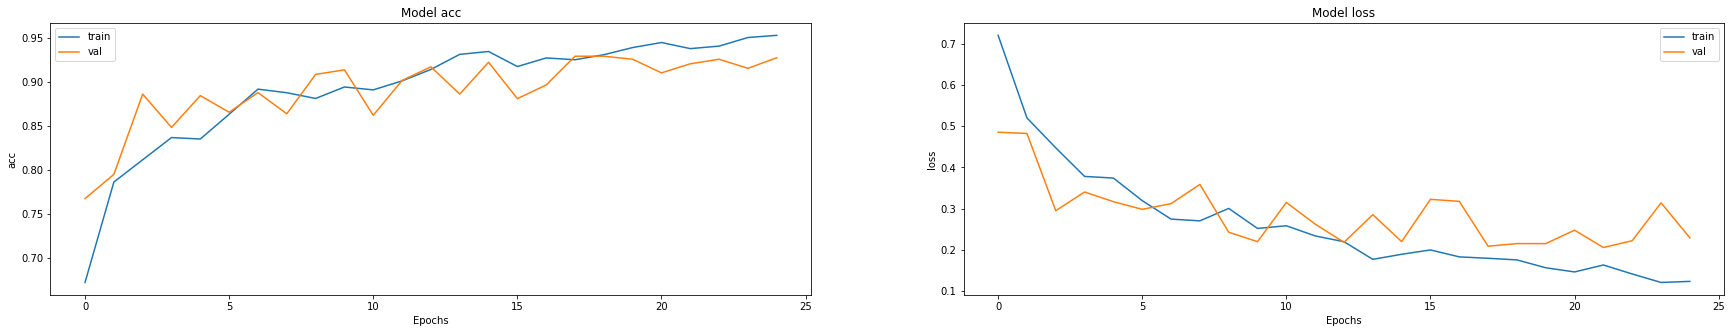

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

pred_labels = model.predict(test_generator)
y_pred = np.argmax(pred_labels, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      glioma       1.00      0.94      0.97        16
  meningioma       0.89      1.00      0.94         8
   pituitary       1.00      1.00      1.00        10

    accuracy                           0.97        34
   macro avg       0.96      0.98      0.97        34
weighted avg       0.97      0.97      0.97        34



In [ ]:
#Plot the confusion matrix. Set Normalize = True/False
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion Matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
Normalized confusion matrix


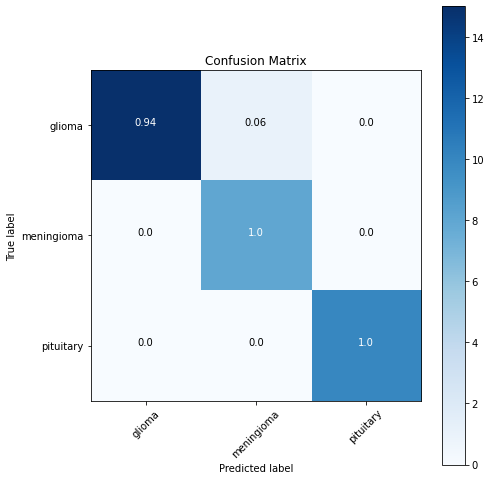

In [ ]:
pred = model.predict(test_generator)
labels = np.argmax(pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, labels)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Model 2

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

resModel = ResNet50(include_top=False,weights='imagenet', input_tensor=Input(shape=(150, 150, 3)))

94781440/94765736 [==============================] - 2s 0us/step


In [ ]:
resModel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
x = layers.Flatten()(resModel.output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)                 
x = layers.Dense(3, activation='softmax')(x) 

In [ ]:
model2 = Model(resModel.input, x)

In [ ]:
for layer in resModel.layers:
  layer.trainable = False

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.001, decay=0.001/32), # decay = learning_rate / batch_size 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
# history2 = model2.fit(train_generator, batch_size=32, epochs=25, validation_data = validation_generator, callbacks=CALLBACKS)

Epoch 1/25
77/77 [==============================] - 71s 865ms/step - loss: 1.0878 - acc: 0.4302 - val_loss: 1.0467 - val_acc: 0.4655
Epoch 2/25
77/77 [==============================] - 65s 848ms/step - loss: 1.0450 - acc: 0.5020 - val_loss: 0.9970 - val_acc: 0.5379
Epoch 3/25
77/77 [==============================] - 64s 830ms/step - loss: 0.9610 - acc: 0.5633 - val_loss: 0.8873 - val_acc: 0.6448
Epoch 4/25
77/77 [==============================] - 64s 827ms/step - loss: 0.9064 - acc: 0.5890 - val_loss: 0.7827 - val_acc: 0.6483
Epoch 5/25
77/77 [==============================] - 65s 850ms/step - loss: 0.9057 - acc: 0.5947 - val_loss: 0.7981 - val_acc: 0.6466
Epoch 6/25
77/77 [==============================] - 64s 837ms/step - loss: 0.9005 - acc: 0.5878 - val_loss: 0.8273 - val_acc: 0.6621
Epoch 7/25
77/77 [==============================] - 64s 837ms/step - loss: 0.8854 - acc: 0.5980 - val_loss: 0.7687 - val_acc: 0.6810
Epoch 8/25
77/77 [==============================] - 64s 834ms/step - 

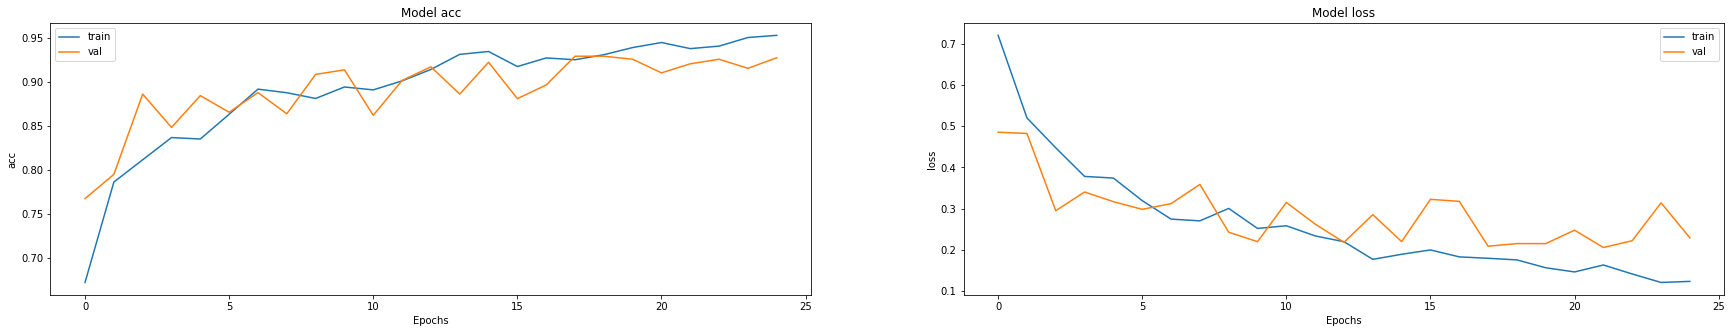

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

pred_labels = model2.predict(test_generator)
y_pred = np.argmax(pred_labels, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      glioma       0.70      0.88      0.78        16
  meningioma       0.00      0.00      0.00         8
   pituitary       0.71      1.00      0.83        10

    accuracy                           0.71        34
   macro avg       0.47      0.62      0.54        34
weighted avg       0.54      0.71      0.61        34



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Plot the confusion matrix. Set Normalize = True/False
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion Matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
Normalized confusion matrix


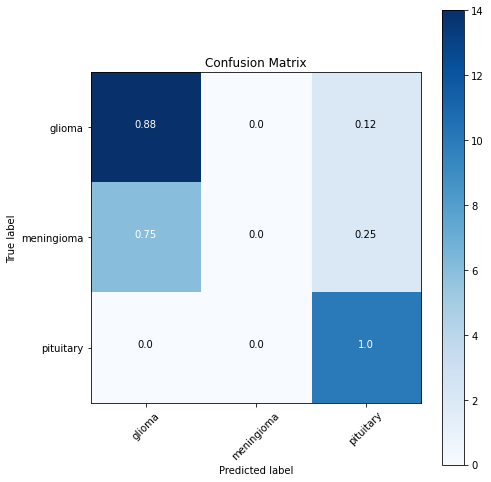

In [ ]:
pred = model2.predict(test_generator)
labels = np.argmax(pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, labels)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#H Param

In [ ]:
from tensorboard.plugins.hparams import api as hp
%load_ext tensorboard

In [ ]:
!rm -rf ./logs/

In [ ]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([64, 128]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.2, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
xvl, yvl = zip(*(validation_generator[i] for i in range(len(validation_generator))))
x_val, y_val = np.vstack(xvl), np.vstack(yvl)

In [ ]:
# Feature Extraction Layer
def train_test_model(hparams):

  model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='categorical_crossentropy',
      metrics=['accuracy'],
  )

  model.fit(train_generator, 
            validation_data=validation_generator, 
            epochs=5,
            )
  _, accuracy = model.evaluate(x_val, y_val)
  return accuracy

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=50)

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'num_units': 64, 'dropout': 0.2, 'optimizer': 'adam'}
Epoch 1/5
77/77 [==============================] - 78s 830ms/step - loss: 0.6885 - accuracy: 0.6869 - val_loss: 0.5144 - val_accuracy: 0.7776
Epoch 2/5
77/77 [==============================] - 60s 786ms/step - loss: 0.5120 - accuracy: 0.7755 - val_loss: 0.3241 - val_accuracy: 0.8690
Epoch 3/5
77/77 [==============================] - 61s 790ms/step - loss: 0.3767 - accuracy: 0.8437 - val_loss: 0.4111 - val_accuracy: 0.8345
Epoch 4/5
77/77 [==============================] - 61s 792ms/step - loss: 0.4275 - accuracy: 0.8241 - val_loss: 0.3153 - val_accuracy: 0.8707
Epoch 5/5
19/19 [==============================] - 3s 136ms/step - loss: 0.2676 - accuracy: 0.8879
--- Starting trial: run-1
{'num_units': 64, 'dropout': 0.2, 'optimizer': 'sgd'}
Epoch 1/5
77/77 [==============================] - 62s 795ms/step - loss: 0.4166 - accuracy: 0.8327 - val_loss: 0.2542 - val_accuracy: 0.8966
Epoch 2/5
77/77 [=============

#Save Model

In [ ]:
model.save('model.tflite')
model2.save('model2.tflite')

loaded_model = tf.keras.models.load_model('model1.tflite')
loaded_model.layers[0].input_shape #(None, 150, 150, 3)

loaded_model2 = tf.keras.models.load_model('model2.tflite')
loaded_model2.layers[0].input_shape #(None, 150, 150, 3)

INFO:tensorflow:Assets written to: model.tflite/assets
INFO:tensorflow:Assets written to: model2.tflite/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


[(None, 150, 150, 3)]

Model : model.tflite
Predicted Label : glioma
Probability : 0.9962

Model : model2.tflite
Predicted Label : meningioma
Probability : 0.3289



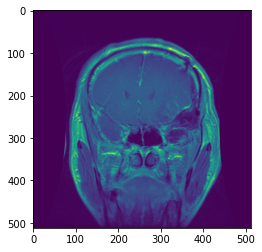

In [ ]:
from PIL import Image
import cv2
from tensorflow.keras.models import  load_model

img_upload = Image.open("/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/tumor_otak/glioma/1.png")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

model_list = ["/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/model.tflite",
              "/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/model2.tflite"]
labels = ['meningioma', 'glioma', 'pituitary']

for m in model_list:
    model = load_model(m)
    size_img = model.layers[0].output_shape[1:2]
    imgs = cv2.resize(img,(150, 150), interpolation = cv2.INTER_CUBIC)
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')

Model : model.tflite
Predicted Label : glioma
Probability : 0.9938

Model : model2.tflite
Predicted Label : meningioma
Probability : 0.3221

Model : model.tflite
Predicted Label : glioma
Probability : 0.999

Model : model2.tflite
Predicted Label : meningioma
Probability : 0.3237

Model : model.tflite
Predicted Label : glioma
Probability : 0.9986

Model : model2.tflite
Predicted Label : meningioma
Probability : 0.326



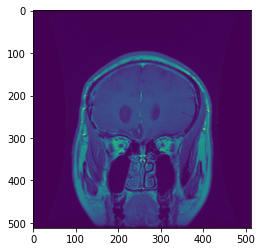

In [ ]:
from PIL import Image
import cv2
from tensorflow.keras.models import  load_model

image = ["/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/tumor_otak/glioma/2.png",
         "/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/tumor_otak/glioma/3.png",
         "/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/tumor_otak/glioma/4.png",]

model_list = ["/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/model.tflite",
              "/content/drive/MyDrive/Colab Notebooks/Semester 7/Pembelajaran Mesin/Modul 5/model2.tflite"]
labels = ['meningioma', 'glioma', 'pituitary']

for i in image :
  img_upload = Image.open(i)
  img = np.array(img_upload)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  for m in model_list:
      model = load_model(m)
      size_img = model.layers[0].output_shape[1:2]
      imgs = cv2.resize(img,(150, 150), interpolation = cv2.INTER_CUBIC)
      imgs = imgs.astype('float32') / 255
      pred = model.predict(np.expand_dims(imgs, axis=0))[0]
      print('Model :', m.split('/')[-1])
      print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
      print('Probability :',[ round(elem, 4) for elem in pred ][0])
      print('===============\n')
      img_plt = plt.imshow(img_upload)

**Contoh prediksi 10 gambar baru**

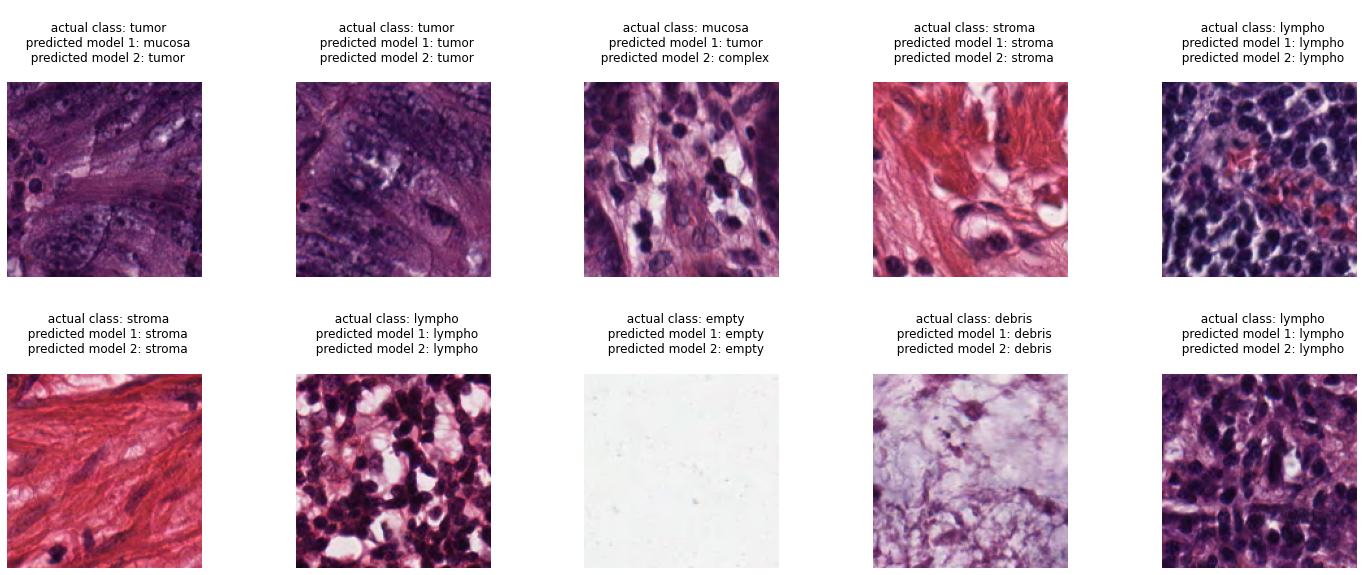

## Kegiatan 2 **(berkelompok)**
30 poin

**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data dan progress pengerjaan tugas kelompok harus berada dalam github repository sebelum praktikum dimulai
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* **Tidak diperbolehkan berganti dataset atau jurnal rujukan**
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Progress pengerjaan tugas kelompok
* Problem solving masing - masing anggota terhadap kendala yang dialami
* Pemahaman masing - masing anggota tim terhadap tugas yang dikerjakan
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)

**Tugas**

Melanjutkan tugas kelompok di modul 1 sampai 3 sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset dengan ketentuan:
 * augmentasi data menggunakan ImageDataGenerator dan salah satu augmentasi opsional lain seperti (random noise, clahe, usuyama, blur, atau yang lainnya)
 * balancing dataset menggunakan teknik oversampling / downsampling
 * splitting dataset menjadi (75% train, 14% validation, 1% test)
*   Melakukan training beberapa skema model menggunakan pretrained model **(minimal 2 model)** dengan 100 epoch per model
* Menyimpan model yang telah di training kedalam file `.tflite`  [Lihat disini](https://www.tensorflow.org/lite/convert)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.



In [58]:
import json
import os  # Create directories, list files
import zipfile
import shutil
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
import mlxtend
import tensorflow as tf
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization 
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import time

from tensorflow.keras.layers import Dense, Flatten, Concatenate,Input,Conv2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, concatenate
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [2]:
input_folder="dataset"
base_dir="dataset_split"

In [7]:
import splitfolders
splitfolders.ratio(input= input_folder, output= base_dir, seed=1337, ratio=(0.8, 0.19, 0.01))

Copying files: 5856 files [00:53, 109.07 files/s]


In [6]:
import os
Train = os.path.join(base_dir, 'Train')
Test = os.path.join(base_dir, 'Test')
Val = os.path.join(base_dir, 'Val')

In [7]:
file_train_normal = os.listdir(Train + "/Normal")
file_train_pneumonia = os.listdir(Train + "/Pneumonia")

file_val_normal   = os.listdir(Val + "/Normal")
file_val_pneumonia  = os.listdir(Val + "/Pneumonia")

file_test_normal  = os.listdir(Test + "/Normal")
file_test_pneumonia   = os.listdir(Test + "/Pneumonia")

print("total training normal images      : " + str(len(file_train_normal)))
print("total training pneumonia images      : " + str(len(file_train_pneumonia)))

print("total val normal images       : " + str(len(file_val_normal)))
print("total val pneumonia images       : " + str(len(file_val_pneumonia)))

print("total test normal images       : " + str(len(file_test_normal)))
print("total test pneumonia images       : " + str(len(file_test_pneumonia)))

total training normal images      : 1266
total training pneumonia images      : 3418
total val normal images       : 300
total val pneumonia images       : 811
total test normal images       : 17
total test pneumonia images       : 44


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# define generator
train_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
)

val_gen = ImageDataGenerator(rescale = 1./255)

In [9]:
batch_size = 32

In [10]:
train_generator = train_gen.flow_from_directory(
    Train,
    target_size=(100, 100),
    class_mode='binary',
    color_mode="rgb",
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    Val,
    target_size=(100,100),
    class_mode='binary',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 4684 images belonging to 2 classes.
Found 1111 images belonging to 2 classes.


In [11]:
x_train, y_train = next(train_generator)
x_val, y_val = next(validation_generator)

In [12]:
x_train

array([[[[3.03934561e-03, 3.03934561e-03, 3.03934561e-03],
         [1.99768413e-03, 1.99768413e-03, 1.99768413e-03],
         [9.56022646e-04, 9.56022646e-04, 9.56022646e-04],
         ...,
         [8.95565629e-01, 8.95565629e-01, 8.95565629e-01],
         [8.74132037e-01, 8.74132037e-01, 8.74132037e-01],
         [8.45031321e-01, 8.45031321e-01, 8.45031321e-01]],

        [[5.15651249e-04, 5.15651249e-04, 5.15651249e-04],
         [1.55731279e-03, 1.55731279e-03, 1.55731279e-03],
         [2.59897416e-03, 2.59897416e-03, 2.59897416e-03],
         ...,
         [8.85311306e-01, 8.85311306e-01, 8.85311306e-01],
         [8.61001670e-01, 8.61001670e-01, 8.61001670e-01],
         [8.30976486e-01, 8.30976486e-01, 8.30976486e-01]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [8.75056922e-01, 8.75056922e-01, 8.75056922e-01],
         [

In [13]:
y_train

array([1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

In [14]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(Train):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [16]:
val_data = []
val_label = []
for r, d, f in os.walk(Val):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [17]:
test_data = []
test_label = []
for r, d, f in os.walk(Test):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [18]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (4684, 100, 100, 3)
Train Label =  (4684,)
Validation Data =  (1111, 100, 100, 3)
Validation Label =  (1111,)
Test Data =  (61, 100, 100, 3)
Test Label =  (61,)


In [19]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [36 36 36]
Data setelah di-normalisasi  [0.14117648 0.14117648 0.14117648]


In [20]:
x_train.shape

(4684, 100, 100, 3)

In [21]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[100:110])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)
print("Label setelah di-encoder ", y_train[100:110])

Label sebelum di-encoder  ['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]


In [22]:
y_train.shape

(4684,)

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
smote = SMOTE()

In [25]:
y_train.shape

(4684,)

In [26]:
x_train.shape

(4684, 100, 100, 3)

In [27]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train == 1)))

Before OverSampling, counts of label '0': 1266
Before OverSampling, counts of label '1': 3418 



In [28]:
x_train = np.random.rand(4684, 100, 100,3)
orig_shape = x_train.shape
print(orig_shape)

(4684, 100, 100, 3)


In [29]:
x_train = x_train.reshape(4684,3*100*100)
print(x_train.shape)

(4684, 30000)


In [30]:
x_train.shape

(4684, 30000)

In [31]:
x_smote_train, y_smote_train = smote.fit_resample(x_train,y_train)

In [32]:
x_smote_train.shape

(6836, 30000)

In [33]:
x_smote_train = np.random.rand(6836, 100, 100,3)
orig_shape_smote = x_smote_train.shape
print(orig_shape_smote)

(6836, 100, 100, 3)


In [34]:
from collections import Counter

In [35]:
print("Before SMOTE = ", Counter(y_train))
print("After SMOTE = ", Counter(y_smote_train))

Before SMOTE =  Counter({1: 3418, 0: 1266})
After SMOTE =  Counter({0: 3418, 1: 3418})


In [36]:
x_smote_train.shape

(6836, 100, 100, 3)

In [37]:
from tensorflow.keras.utils import to_categorical

In [38]:
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)

In [39]:
y_train_one_hot_smote = to_categorical(y_smote_train)

In [40]:
#EDA

In [41]:
file_train_normal = os.listdir(Train + "/Normal")
file_train_pneumonia = os.listdir(Train + "/Pneumonia")

file_val_normal   = os.listdir(Val + "/Normal")
file_val_pneumonia  = os.listdir(Val + "/Pneumonia")

file_test_normal  = os.listdir(Test + "/Normal")
file_test_pneumonia   = os.listdir(Test + "/Pneumonia")

print("total training normal images      : " + str(len(file_train_normal)))
print("total training pneumonia images      : " + str(len(file_train_pneumonia)))

print("total val normal images       : " + str(len(file_val_normal)))
print("total val pneumonia images       : " + str(len(file_val_pneumonia)))

print("total test normal images       : " + str(len(file_test_normal)))
print("total test pneumonia images       : " + str(len(file_test_pneumonia)))

total training normal images      : 1266
total training pneumonia images      : 3418
total val normal images       : 300
total val pneumonia images       : 811
total test normal images       : 17
total test pneumonia images       : 44


In [42]:
normal_dir=os.path.join(Train + "/Normal")
pneumonia_dir=os.path.join(Train + "/Pneumonia")

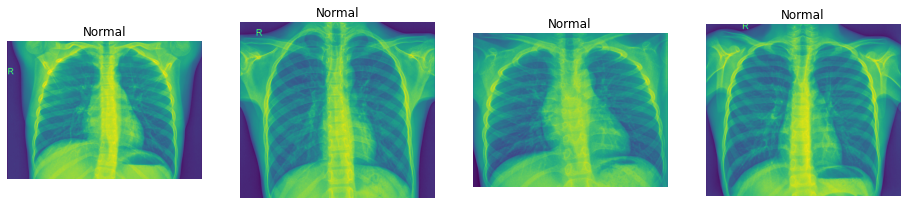

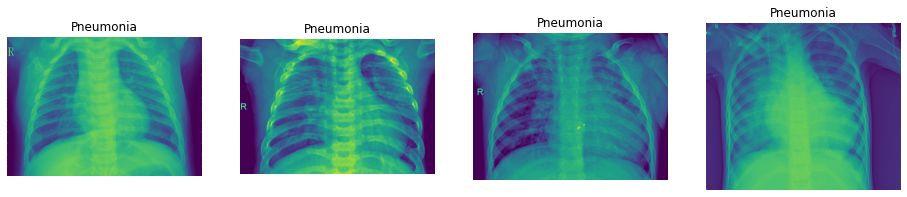

In [43]:
normal_image = os.listdir(normal_dir)
pneumonia_image = os.listdir(pneumonia_dir)

fname1 = [os.path.join(normal_dir,fname)
        for fname in normal_image[:4]]

fname2 = [os.path.join(pneumonia_dir,fname)
        for fname in pneumonia_image[:4]]

ncolumns = 4
nrows = 2
fig = plt.gcf()
fig.set_size_inches(ncolumns*4,nrows*4)

for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Normal')
    plt.imshow(img)
plt.show()

ncolumns = 4
nrows = 2
fig = plt.gcf()
fig.set_size_inches(ncolumns*4,nrows*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Pneumonia')
    plt.imshow(img)
    
plt.show()

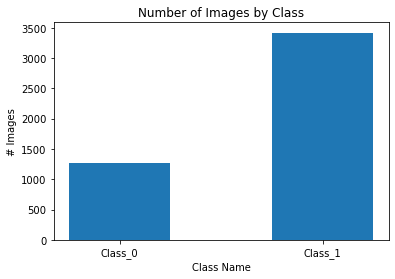

In [44]:
number_classes = {
'Class_0': len(os.listdir(normal_dir)),
'Class_1': len(os.listdir(pneumonia_dir))}

plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

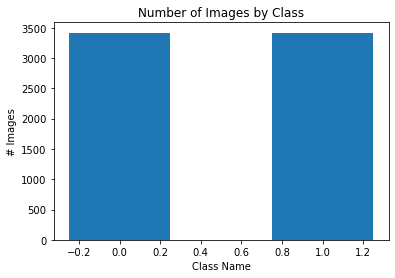

In [45]:
number_classes2 = Counter(y_smote_train)
plt.bar(number_classes2.keys(), number_classes2.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

In [46]:
print("SEBELUM SMOTE")
print("Jumlah Train Gambar = "+str(len(x_train)))
print("Jumlah Train Label = "+str(len(y_train)))
print("Jumlah Gambar Per-class = "+str(Counter(y_train)))
print(" ")
print("SETELAH SMOTE")
print("Jumlah Train Gambar = "+str(len(x_smote_train)))
print("Jumlah Train Label = "+str(len(y_smote_train)))
print("Jumlah Gambar Per-class = "+str(Counter(y_smote_train)))

SEBELUM SMOTE
Jumlah Train Gambar = 4684
Jumlah Train Label = 4684
Jumlah Gambar Per-class = Counter({1: 3418, 0: 1266})
 
SETELAH SMOTE
Jumlah Train Gambar = 6836
Jumlah Train Label = 6836
Jumlah Gambar Per-class = Counter({0: 3418, 1: 3418})


In [47]:
#model

In [48]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout,AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time
from tensorflow.keras import layers

In [49]:
# Pertama, kita import dulu library yang dibutuhkan
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.applications.vgg16 import VGG16

In [50]:
# Kita load model VGG16, kemudian kita potong bagian Top atau Fully Connected Layernya
baseModel = VGG16(include_top=False, input_tensor=Input(shape=(100, 100, 3)))

In [51]:
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [52]:
x = layers.Flatten()(baseModel.output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)                 
x = layers.Dense(1, activation='sigmoid')(x) 

In [53]:
model = Model(baseModel.input, x)

In [54]:
for layer in baseModel.layers:
  layer.trainable = False

In [55]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.9:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()

#EarlyStopping callback to make sure model is always learning
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [60]:
from tensorflow.keras.optimizers import Adam

CALLBACKS = [my_callback]

model.compile(optimizer=Adam(learning_rate=0.001, decay=0.001/32), # decay = learning_rate / batch_size 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [61]:
history = model.fit(train_generator, batch_size=32, epochs=25, validation_data = validation_generator, callbacks=CALLBACKS)

Epoch 1/25
147/147 [==============================] - 112s 687ms/step - loss: 0.2995 - acc: 0.8689 - val_loss: 0.3246 - val_acc: 0.8632
Epoch 2/25
147/147 [==============================] - 86s 586ms/step - loss: 0.2002 - acc: 0.9246 - val_loss: 0.2744 - val_acc: 0.8920
Epoch 3/25
147/147 [==============================] - ETA: 0s - loss: 0.1964 - acc: 0.9204
Reached accuracy threshold! Terminating training.
147/147 [==============================] - 93s 630ms/step - loss: 0.1964 - acc: 0.9204 - val_loss: 0.2054 - val_acc: 0.9253


In [62]:
history = model.fit(train_generator, batch_size=32, epochs=25, validation_data = validation_generator)

Epoch 1/25
147/147 [==============================] - 77s 523ms/step - loss: 0.1885 - acc: 0.9276 - val_loss: 0.1998 - val_acc: 0.9181
Epoch 2/25
147/147 [==============================] - 87s 590ms/step - loss: 0.1865 - acc: 0.9270 - val_loss: 0.2017 - val_acc: 0.9217
Epoch 3/25
147/147 [==============================] - 85s 580ms/step - loss: 0.1685 - acc: 0.9366 - val_loss: 0.1538 - val_acc: 0.9451
Epoch 4/25
147/147 [==============================] - 92s 627ms/step - loss: 0.1889 - acc: 0.9234 - val_loss: 0.2191 - val_acc: 0.9073
Epoch 5/25
147/147 [==============================] - 97s 651ms/step - loss: 0.1779 - acc: 0.9317 - val_loss: 0.1973 - val_acc: 0.9235
Epoch 6/25
147/147 [==============================] - 96s 651ms/step - loss: 0.1707 - acc: 0.9336 - val_loss: 0.1893 - val_acc: 0.9271
Epoch 7/25
147/147 [==============================] - 98s 665ms/step - loss: 0.1620 - acc: 0.9334 - val_loss: 0.1626 - val_acc: 0.9388
Epoch 8/25
147/147 [==============================] - 9

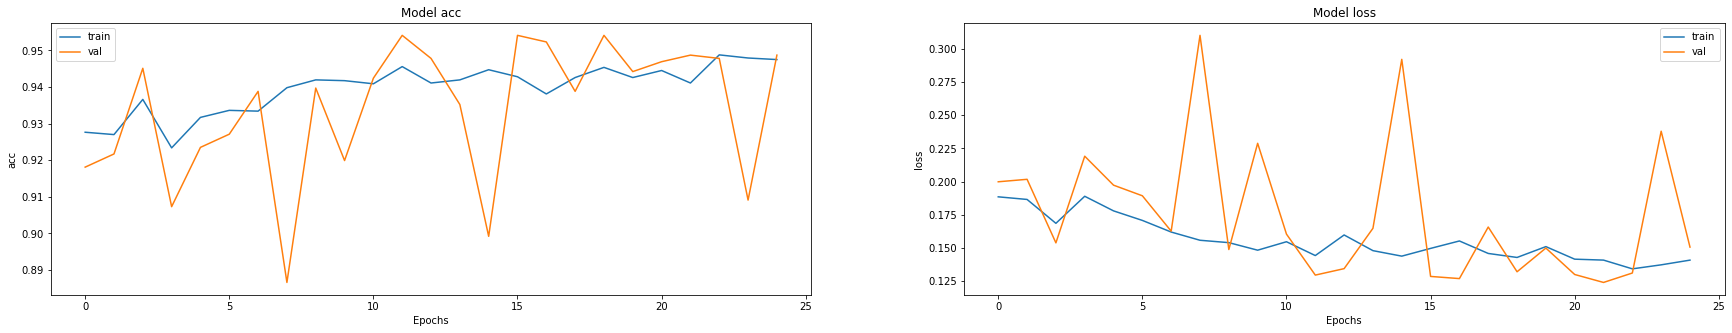

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

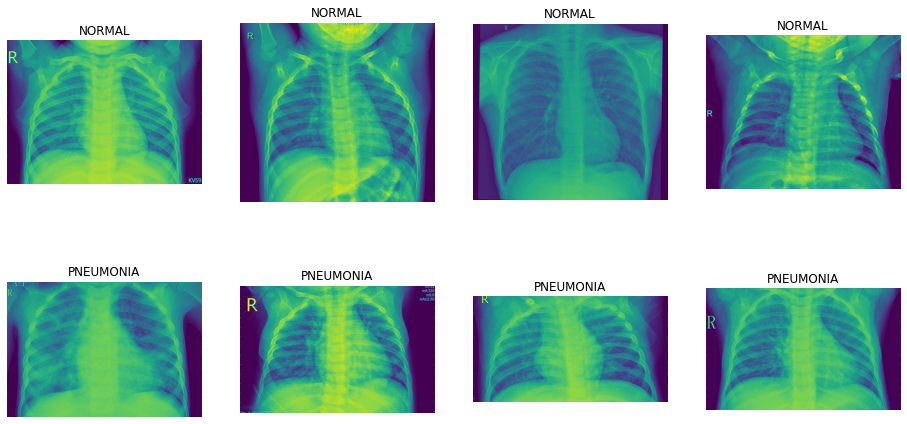

In [ ]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8

train_normal = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]

train_pneumonia = [os.path.join(train_pneumonia_dir, fname) 
                for fname in os.listdir(train_pneumonia_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(train_normal+train_pneumonia):
    
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()